<a href="https://colab.research.google.com/github/chaeeun0405/ML_Class/blob/main/5%EC%A3%BC%EC%B0%A8/ML_5-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

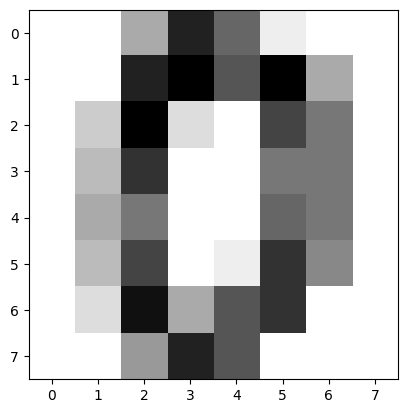

In [13]:
# 데이터셋 읽기
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [14]:
print(digits.data.shape)   # (1797, 64) → 1797장의 8x8 그림, 펼치면 64차원 벡터
print(digits.target.shape) # (1797,)    → 각 그림의 정답 숫자

(1797, 64)
(1797,)


In [18]:
X = digits.data    # (1797, 64) → 입력: 각 그림을 펼친 값 (0~16)
y = digits.target  # (1797,)    → 출력: 정답 숫자 (0~9)

# 스케일링 & 원 핫 인코딩
scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values

#테스트, 학습 데이터 나누기
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [19]:
#모델 정의
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#모델 컴파일
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [22]:
# 모델 학습 (fit)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3624 - loss: 1.9604 - val_accuracy: 0.7431 - val_loss: 1.0021
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8088 - loss: 0.8706 - val_accuracy: 0.9132 - val_loss: 0.4584
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.3899 - val_accuracy: 0.9340 - val_loss: 0.2724
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9566 - loss: 0.2160 - val_accuracy: 0.9444 - val_loss: 0.1990
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9736 - loss: 0.1382 - val_accuracy: 0.9479 - val_loss: 0.1624
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9827 - loss: 0.1028 - val_accuracy: 0.9688 - val_loss: 0.1420
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0716 - val_accuracy: 0.9722 - val_loss: 0.1180
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9942 - loss: 0.0581 - val_accuracy: 0.9757 - val_loss

In [23]:
# 테스트 데이터 예측
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [24]:
# 학습 곡선 데이터 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

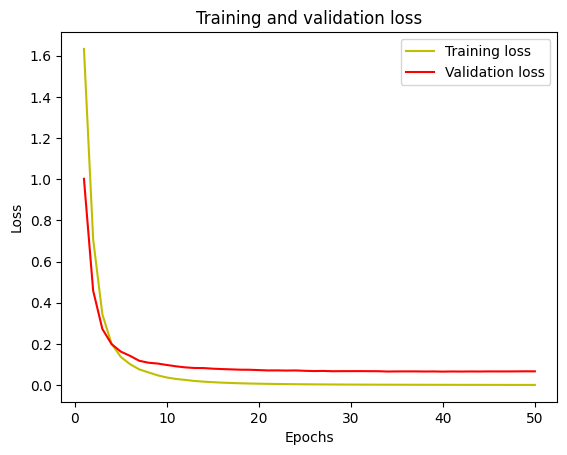

In [25]:
# 학습/검증 손실 시각화
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

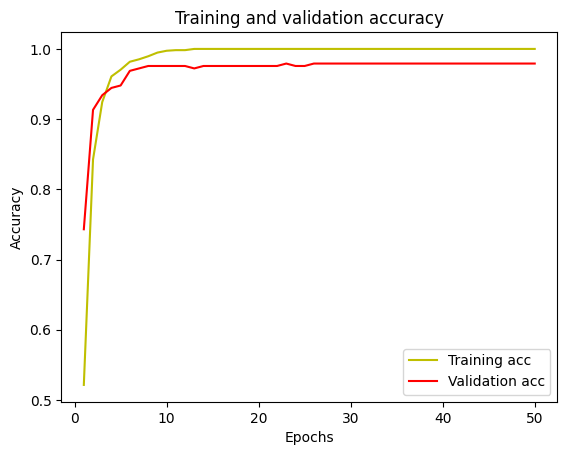

In [26]:
# 학습/검증 정확도 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
# 최종 성능 평가
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       1.00      0.97      0.99        36
           3       0.93      0.97      0.95        29
           4       0.97      0.97      0.97        30
           5       0.97      0.95      0.96        40
           6       0.98      0.98      0.98        44
           7       0.97      0.97      0.97        39
           8       1.00      0.95      0.97        39
           9       0.93      0.98      0.95        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  1  0  0  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0